In [159]:
# data analysis and wrangling
import pandas as pd
import numpy as np

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#logging
import logging

#warnings
import warnings
warnings.filterwarnings('ignore')

In [178]:
#Setting up logging
import logging
logger = logging.getLogger()
fhandler = logging.FileHandler(filename='MyLog.log', mode='a')
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
fhandler.setFormatter(formatter)
logger.addHandler(fhandler)
logger.setLevel(logging.DEBUG)

In [179]:
train_df = pd.read_csv('rossmann-store-sales/train.csv', parse_dates = ['Date'])
test_df = pd.read_csv('rossmann-store-sales/test.csv', parse_dates = ['Date'])
store_df = pd.read_csv('rossmann-store-sales/store.csv')
submission_df = pd.read_csv('rossmann-store-sales/sample_submission.csv')

In [180]:
logging.info(f'Train Dataset Loaded')
logging.info(f'Test Dataset Loaded')
logging.info(f'Store Dataset Loaded')

INFO:root:Train Dataset Loaded
INFO:root:Test Dataset Loaded
INFO:root:Store Dataset Loaded


In [151]:
train_df.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


In [6]:
test_df.tail(10)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
41078,41079,1104,6,2015-08-01,1.0,0,0,0
41079,41080,1105,6,2015-08-01,1.0,0,0,0
41080,41081,1106,6,2015-08-01,1.0,0,0,0
41081,41082,1107,6,2015-08-01,1.0,0,0,0
41082,41083,1109,6,2015-08-01,1.0,0,0,0
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0
41087,41088,1115,6,2015-08-01,1.0,0,0,1


In [7]:
store_df.head(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [8]:
submission_df.head()

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


Logging

In [181]:
logging.info(train_df.columns)

INFO:root:Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')


In [182]:
logging.info(test_df.columns)

INFO:root:Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday'],
      dtype='object')


Merging both the train dataset and the test dataset with the store dataset

In [11]:
train = pd.merge(train_df, store_df, on = ['Store'])
test = pd.merge(test_df, store_df, on = ['Store'])

In [12]:
train.info()
print('_' *40)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1014567 no

Description of numerical variables

In [13]:
train.describe(include=[np.number])

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.014567e+06,693861.000000,693861.000000,1.017209e+06,509178.000000,509178.000000
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.430086e+03,7.222866,2008.690228,5.005638e-01,23.269093,2011.752774
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.715324e+03,3.211832,5.992644,4.999999e-01,14.095973,1.662870
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,1.000000,1900.000000,0.000000e+00,1.000000,2009.000000
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,4.000000,2006.000000,0.000000e+00,13.000000,2011.000000
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,8.000000,2010.000000,1.000000e+00,22.000000,2012.000000
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.890000e+03,10.000000,2013.000000,1.000000e+00,37.000000,2013.000000
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,12.000000,2015.000000,1.000000e+00,50.000000,2015.000000


In [14]:
test.describe(include=[np.number])

,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,41088.000000,41088.000000,41088.000000,41077.000000,41088.000000,41088.000000,40992.000000,25872.000000,25872.000000,41088.000000,23856.000000,23856.000000
mean,20544.500000,555.899533,3.979167,0.854322,0.395833,0.443487,5088.583138,7.035250,2008.641929,0.580607,24.426559,2011.820926
std,11861.228267,320.274496,2.015481,0.352787,0.489035,0.496802,7225.487467,3.143015,6.862400,0.493466,14.161312,1.692166
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,10272.750000,279.750000,2.000000,1.000000,0.000000,0.000000,720.000000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000,2425.000000,7.000000,2010.000000,1.000000,22.000000,2012.000000
75%,30816.250000,832.250000,6.000000,1.000000,1.000000,1.000000,6480.000000,9.000000,2012.000000,1.000000,37.000000,2013.000000
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000,75860.000000,12.000000,2015.000000,1.000000,49.000000,2015.000000


Description of categorical variables

In [15]:
train.describe(include =['O'])

,StateHoliday,StoreType,Assortment,PromoInterval
count,1017209,1017209,1017209,509178
unique,5,4,3,3
top,0,a,a,"Jan,Apr,Jul,Oct"
freq,855087,551627,537445,293122


In [16]:
test.describe(include=['O'])

,StateHoliday,StoreType,Assortment,PromoInterval
count,41088,41088,41088,23856
unique,2,4,3,3
top,0,a,c,"Jan,Apr,Jul,Oct"
freq,40908,22128,20352,13776


Counts the occurence of store for each StateHoliday Category in train dataset

In [17]:
columns_to_show = ['Store']

train.groupby(['StateHoliday'])[columns_to_show].count()

,Store
StateHoliday,
0,131072
0,855087
a,20260
b,6690
c,4100


Counts the occurence of store for each StateHoliday Category in test dataset

In [18]:
# In the test dataset, there is only an instance of StateHoliday (a = public holiday)
# Unlike the train dataset with four instances of StateHoliday
test['StateHoliday'].unique()

array(['0', 'a'], dtype=object)

In [19]:
test.groupby('StateHoliday')[['Store']].count()

,Store
StateHoliday,
0,40908
a,180


Counts the occurence of when store is opened and closed in the train dataset

In [20]:
columns_to_show = ['Store']

train.groupby(['Open'])[columns_to_show].count()

,Store
Open,
0,172817
1,844392


Counts the occurence of when store is opened and closed in the test dataset

In [21]:
columns_to_show = ['Store']

test.groupby(['Open'])[columns_to_show].count()

,Store
Open,
0.0,5984
1.0,35093


Counts the occurence when store is opened and no state holiday in train dataset

In [22]:
train['Store'][(train['Open'] == 1) & (train['StateHoliday'] == 0)].count()

112140

Counts the occurence when store is closed and no state holiday in train dataset

In [23]:
train['Store'][(train['Open'] == 0) & (train['StateHoliday'] == 0)].count()

18932

Counts the occurence when store is opened and there is school holiday in train dataset

In [24]:
train['Store'][(train['Open'] == 1) & (train['SchoolHoliday'] == 1)].count()

163457

Counts the occurence when store is closed and there is school holiday in train dataset

In [25]:
train['Store'][(train['Open'] == 0) & (train['SchoolHoliday'] == 1)].count()

18264

Counts the occurence when store is opened and there is no school holiday in train dataset

In [26]:
train['Store'][(train['Open'] == 1) & (train['SchoolHoliday'] == 0)].count()

680935

Counts the occurence when store is closed and there is no school holiday in train dataset

In [27]:
train['Store'][(train['Open'] == 0) & (train['SchoolHoliday'] == 0)].count()

154553

Counts the occurence when shop is opened and closed in test dataset

In [28]:
test['Store'][test['Open'] == 1].count()

35093

In [29]:
test['Store'][test['Open'] == 0].count()

5984

Counts the occurence of when the store is opened and there is no state holiday in test dataset

In [30]:
test['Store'][(test['Open'] == 1) & (test['StateHoliday'] == '0')].count()

35067

Counts the occurence of when the store is opened and there is state holiday in test dataset

In [31]:
test['Store'][(test['Open'] == 1) & (test['StateHoliday'] == 'a')].count()

26

Counts the occurence of when the store is closed and there is no state holiday in test dataset

In [32]:
test['Store'][(test['Open'] == 0) & (test['StateHoliday'] == '0')].count()

5830

Counts the occurence of when the store is closed and there is state holiday in test dataset

In [33]:
test['Store'][(test['Open'] == 0) & (test['StateHoliday'] == 'a')].count()

154

In [34]:
train[train['Sales'] != 0].count()

Store                        844338
DayOfWeek                    844338
Date                         844338
Sales                        844338
Customers                    844338
Open                         844338
Promo                        844338
StateHoliday                 844338
SchoolHoliday                844338
StoreType                    844338
Assortment                   844338
CompetitionDistance          842152
CompetitionOpenSinceMonth    575738
CompetitionOpenSinceYear     575738
Promo2                       844338
Promo2SinceWeek              421046
Promo2SinceYear              421046
PromoInterval                421046
dtype: int64

In [35]:
train[train['Sales'] == 0].count()

Store                        172871
DayOfWeek                    172871
Date                         172871
Sales                        172871
Customers                    172871
Open                         172871
Promo                        172871
StateHoliday                 172871
SchoolHoliday                172871
StoreType                    172871
Assortment                   172871
CompetitionDistance          172415
CompetitionOpenSinceMonth    118123
CompetitionOpenSinceYear     118123
Promo2                       172871
Promo2SinceWeek               88132
Promo2SinceYear               88132
PromoInterval                 88132
dtype: int64

Creating Month from Date

In [36]:
# Date variables
import datetime

train['month'] = train.Date.dt.month
train['year'] = train.Date.dt.year

In [249]:
test['month'] = test.Date.dt.month
train['year'] = test.Date.dt.year

#### Mean of Sales when Promo is on and off

In [37]:
train[['Promo', 'Sales']].groupby(['Promo'], as_index=False).mean().sort_values(by='Sales', ascending=False)

,Promo,Sales
1,1,7991.152046
0,0,4406.050805


#### Mean of sales in each Store Type

In [38]:
train[["StoreType", "Sales"]].groupby(['StoreType'], as_index=False).mean().sort_values(by='Sales', ascending=False)

,StoreType,Sales
1,b,10058.837334
0,a,5738.179710
2,c,5723.629246
3,d,5641.819243


#### Mean of Sales during each StateHoliday

In [39]:
train[["StateHoliday", "Sales"]].groupby(['StateHoliday'], as_index=False).mean().sort_values(by='Sales', ascending=False)

,StateHoliday,Sales
1,0,5980.279717
0,0,5733.530624
2,a,290.735686
3,b,214.311510
4,c,168.733171


#### Mean of Sales during each SchoolHoliday

In [40]:
train[["SchoolHoliday", "Sales"]].groupby(['SchoolHoliday'], as_index=False).mean().sort_values(by='Sales', ascending=False)

,SchoolHoliday,Sales
1,1,6476.522207
0,0,5620.979034


#### Average Sales in each month

In [41]:
train[["month", "Sales"]].groupby(['month'], as_index=False).mean().sort_values(by='Sales', ascending=False)

,month,Sales
11,12,6826.611377
6,7,6064.915711
10,11,6008.111821
2,3,5784.578871
5,6,5760.964375
3,4,5738.866916
7,8,5693.016554
1,2,5645.253150
8,9,5570.246033
9,10,5537.037419


#### Plotting average sales for each month - slight strong end of the year peak (December)

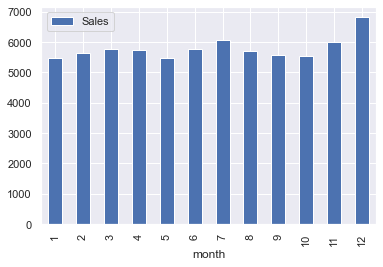

In [206]:
#train_df['isWeekend'] = train_df['DOW'].apply(fun)
train.groupby('month').mean().reset_index().plot(y='Sales', x='month', kind='bar')
plt.savefig('Sales by Month')

#### Count of Customers for each month

In [43]:
train[['Customers', 'month']].groupby(['month'], as_index=False).count().sort_values(by='Customers', ascending=False)

,month,Customers
2,3,103695
4,5,103695
0,1,103694
3,4,100350
5,6,100350
6,7,98115
1,2,93660
7,8,63550
9,10,63550
11,12,63550


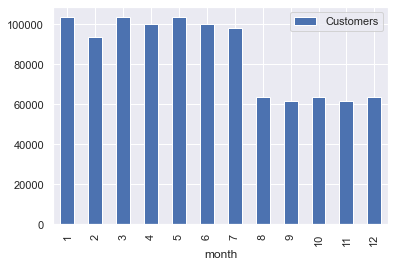

In [207]:
train.groupby('month').count().reset_index().plot(y='Customers', x='month', kind='bar')
plt.savefig('Customers by month.png')

#### Day with the Highest possible sales

In [45]:
train[["DayOfWeek", "Sales"]].groupby(['DayOfWeek'], as_index=False).mean().sort_values(by='Sales', ascending=False)

,DayOfWeek,Sales
0,1,7809.044510
1,2,7005.244467
4,5,6723.274305
2,3,6555.884138
3,4,6247.575913
5,6,5847.562599
6,7,204.183189


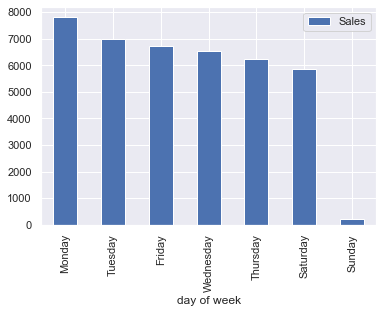

In [228]:
train.groupby('day of week').mean().reset_index().sort_values(by='Sales', ascending = False).plot(y='Sales', x='day of week', kind='bar')
plt.savefig('Sales by Day.png')

#### Day with the highest possible customers

In [47]:
train[["DayOfWeek", "Customers"]].groupby(['DayOfWeek'], as_index=False).count().sort_values(by='Customers', ascending=False)

,DayOfWeek,Customers
3,4,145845
4,5,145845
2,3,145665
1,2,145664
0,1,144730
5,6,144730
6,7,144730


<AxesSubplot:xlabel='DayOfWeek'>

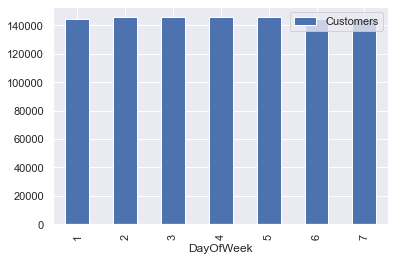

In [48]:
train.groupby('DayOfWeek').count().reset_index().plot(y='Customers', x='DayOfWeek', kind='bar')

In [49]:
train['Assortment'].unique()

array(['a', 'c', 'b'], dtype=object)

In [50]:
train['StoreType'].unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [51]:
store_A = [train['Sales'][(train['Assortment'] == 'a') & (train['StoreType'] == 'a')].mean(), 
           train['Sales'][(train['Assortment'] == 'b') & (train['StoreType'] == 'a')].mean(),
          train['Sales'][(train['Assortment'] == 'c') & (train['StoreType'] == 'a')].mean()]

In [52]:
store_B = [train['Sales'][(train['Assortment'] == 'a') & (train['StoreType'] == 'b')].mean(),
          train['Sales'][(train['Assortment'] == 'b') & (train['StoreType'] == 'b')].mean(),
          train['Sales'][(train['Assortment'] == 'c') & (train['StoreType'] == 'b')].mean()]

In [53]:
store_c = [train['Sales'][(train['Assortment'] == 'a') & (train['StoreType'] == 'c')].mean(),
          train['Sales'][(train['Assortment'] == 'b') & (train['StoreType'] == 'c')].mean(),
          train['Sales'][(train['Assortment'] == 'c') & (train['StoreType'] == 'c')].mean()]

In [54]:
store_d = [train['Sales'][(train['Assortment'] == 'a') & (train['StoreType'] == 'd')].mean(),
          train['Sales'][(train['Assortment'] == 'b') & (train['StoreType'] == 'd')].mean(),
          train['Sales'][(train['Assortment'] == 'c') & (train['StoreType'] == 'd')].mean()]

In [55]:
sample = train.sample(10000)

#### Exploring correlation with targets

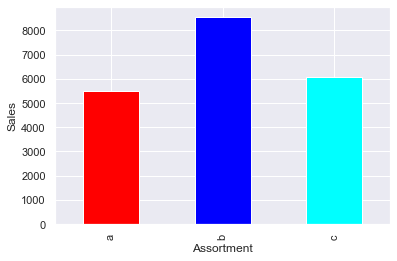

In [209]:
train.groupby('Assortment')['Sales'].mean().plot(kind='bar', color = ['red', 'blue', 'cyan'])
plt.ylabel('Sales')
plt.savefig('Sales by Assortment')

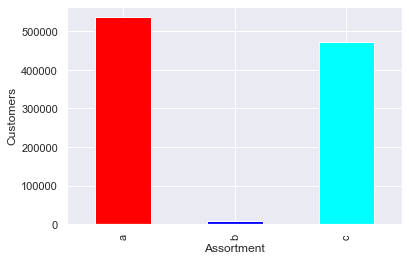

In [210]:
train.groupby('Assortment')['Customers'].count().plot(kind='bar', color = ['red', 'blue', 'cyan'])
plt.ylabel('Customers')
plt.savefig('Customers by Assortment.png')

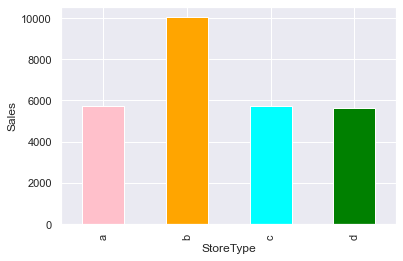

In [211]:
train.groupby('StoreType')['Sales'].mean().plot(kind='bar', color = ['pink', 'orange', 'cyan', 'green'])
plt.ylabel('Sales')
plt.savefig('Sales by StoreType.png')

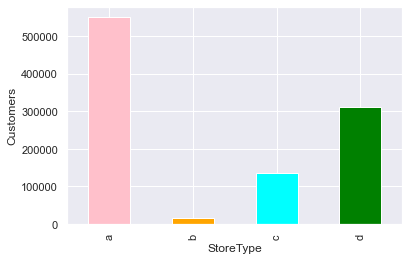

In [212]:
train.groupby('StoreType')['Customers'].count().plot(kind='bar', color = ['pink', 'orange', 'cyan', 'green'])
plt.ylabel('Customers')
plt.savefig('Customers by Storetype.png')

In [60]:
train.groupby('StateHoliday')[['Sales']].mean().sort_values(by = 'Sales', ascending = False)

,Sales
StateHoliday,
0,5980.279717
0,5733.530624
a,290.735686
b,214.311510
c,168.733171


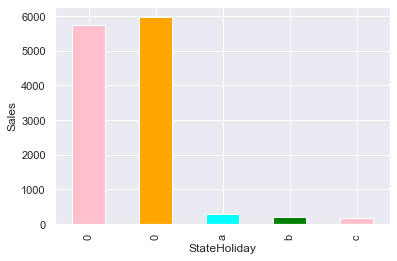

In [213]:
train.groupby('StateHoliday')['Sales'].mean().plot(kind='bar', color = ['pink', 'orange', 'cyan', 'green'])
plt.ylabel('Sales')
plt.savefig('Sales by StateHoliday.png')

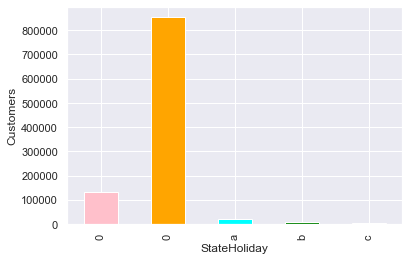

In [214]:
train.groupby('StateHoliday')['Customers'].count().plot(kind='bar', color = ['pink', 'orange', 'cyan', 'green'])
plt.ylabel('Customers')
plt.savefig('Customers by Stateholiday.png')

In [63]:
train.groupby('SchoolHoliday')[['Sales']].mean()

,Sales
SchoolHoliday,
0,5620.979034
1,6476.522207


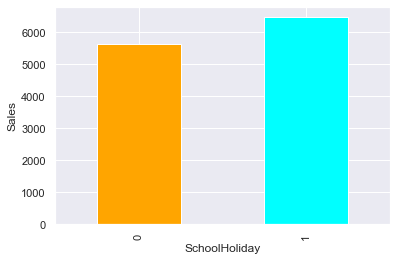

In [215]:
train.groupby('SchoolHoliday')['Sales'].mean().plot(kind='bar', color = ['orange', 'cyan'])
plt.ylabel('Sales')
plt.savefig('Sales by SchoolHoliday.png')

In [65]:
train.groupby('SchoolHoliday')[['Customers']].count()

,Customers
SchoolHoliday,
0,835488
1,181721


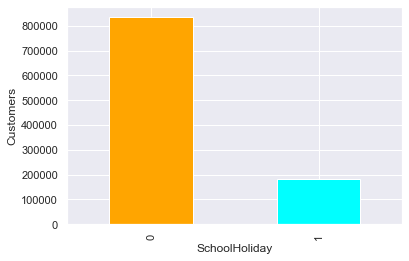

In [216]:
train.groupby('SchoolHoliday')['Customers'].count().plot(kind='bar', color = ['orange', 'cyan'])
plt.ylabel('Customers')
plt.savefig('Customers by SchoolHoliday.png')

In [67]:
train.groupby('Promo')[['Sales']].mean().sort_values(by='Sales', ascending = False)

,Sales
Promo,
1,7991.152046
0,4406.050805


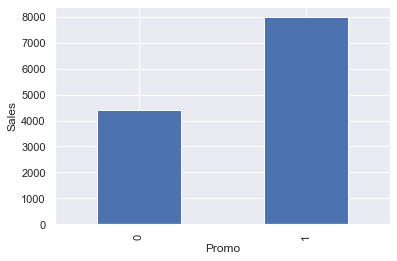

In [217]:
train.groupby('Promo')['Sales'].mean().plot(kind='bar')
plt.ylabel('Sales')
plt.savefig('Sales by Promo.png')

In [69]:
train.groupby('Promo')[['Customers']].count().sort_values(by='Customers', ascending=False)

,Customers
Promo,
0,629129
1,388080


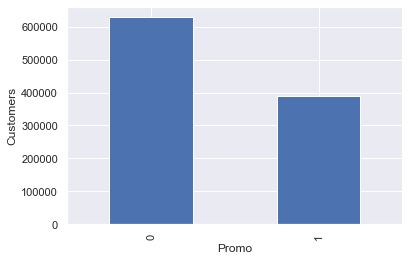

In [218]:
train.groupby('Promo')['Customers'].count().plot(kind='bar')
plt.ylabel('Customers')
plt.savefig('Customers by Promo.png')

In [71]:
train.groupby('Promo2')[['Sales']].mean()

,Sales
Promo2,
0,6124.710161
1,5423.718218


Text(0, 0.5, 'Sales')

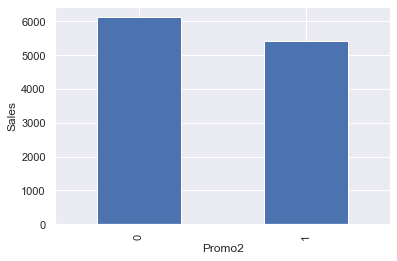

In [72]:
train.groupby('Promo2')['Sales'].mean().plot(kind='bar')
plt.ylabel('Sales')

In [73]:
train.groupby('Promo2')[['Customers']].count()

,Customers
Promo2,
0,508031
1,509178


Text(0, 0.5, 'Sales')

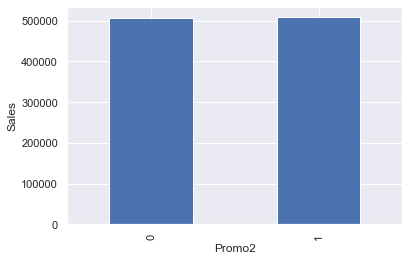

In [74]:
train.groupby('Promo2')['Customers'].count().plot(kind='bar')
plt.ylabel('Sales')

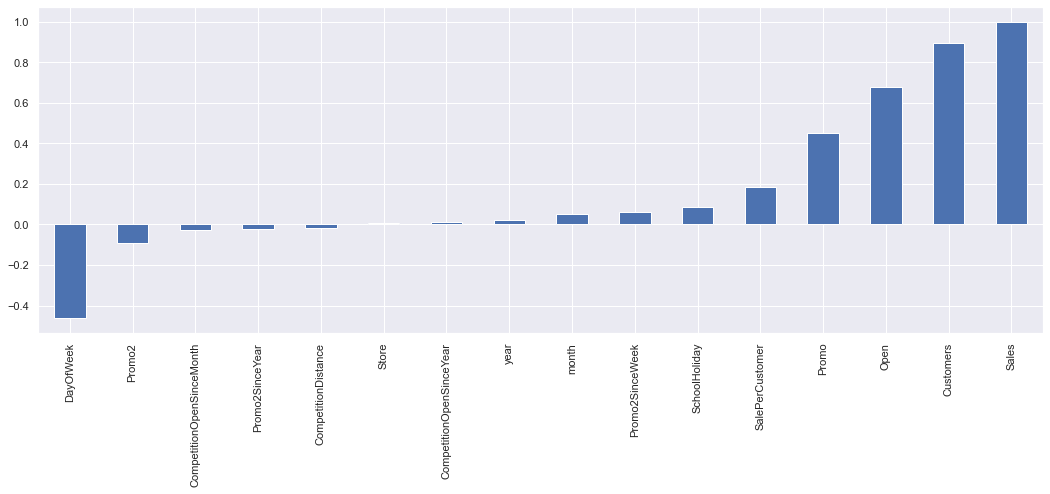

In [184]:
train.corr()['Sales'].sort_values().plot(kind='bar', figsize=(18, 6))
plt.savefig('correlation.png')

The number of customers, whether the shop is opened or not, and running promo are highly correlated to Sales. SchoolHoliday contributes little to sales

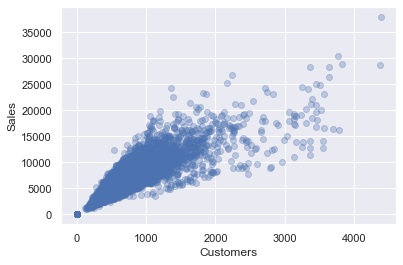

In [219]:
# Look at some scatter plots (only plotting for a subset of data to keep things fast)
sample = train.sample(10000)
plt.scatter(sample['Customers'], sample['Sales'], alpha=0.3)
plt.xlabel('Customers')
plt.ylabel('Sales')
plt.savefig('Customers by Sales.png')

#### Plot of the Month with the highest Sales

In [77]:
train.groupby('year')[['Sales']].mean().sort_values(by='Sales', ascending=False)

,Sales
year,
2015,5878.245380
2014,5833.290704
2013,5658.533675


<AxesSubplot:xlabel='year'>

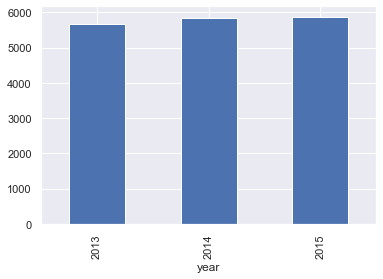

In [78]:
train.groupby('year')['Sales'].mean().plot(kind='bar')

<AxesSubplot:xlabel='year'>

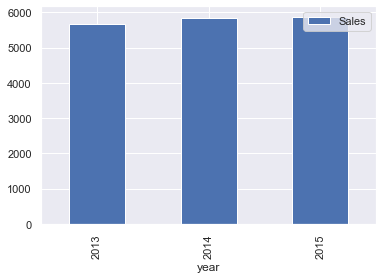

In [79]:
train.groupby('year').mean().reset_index().plot(y='Sales', x='year', kind='bar')

In [80]:
year = train['year'].unique().tolist()
year

[2015, 2014, 2013]

<AxesSubplot:xlabel='year'>

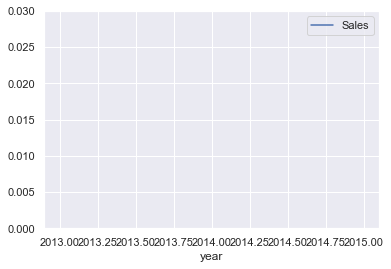

In [81]:
# Plot trend year-on-year
train.groupby('year')['Sales'].mean().reset_index().plot(y='Sales', x='year', ylim=(0, 0.03))

<AxesSubplot:xlabel='Date'>

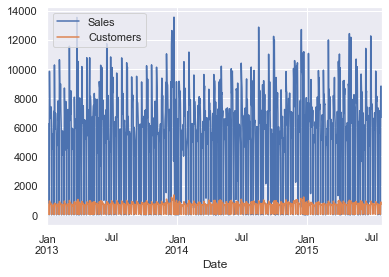

In [82]:
ax = sample.groupby('Date').mean().reset_index().plot(y='Sales', x='Date')
train.groupby('Date').mean().reset_index().plot(y='Customers', x='Date', ax=ax)

In [83]:
train.pivot_table(['Customers', 'Sales'], ['StateHoliday'])

,Customers,Sales
StateHoliday,,
0,642.176125,5733.530624
0,653.298069,5980.279717
a,43.817670,290.735686
b,36.561883,214.311510
c,27.174390,168.733171


In [84]:
train.pivot_table(['Customers', 'Sales'], ['Promo'])

,Customers,Sales
Promo,,
0,517.823542,4406.050805
1,820.098815,7991.152046


In [85]:
train.pivot_table(['Customers', 'Sales'], ['SchoolHoliday'])

,Customers,Sales
SchoolHoliday,,
0,617.645174,5620.979034
1,704.412941,6476.522207


In [86]:
train.pivot_table(['Customers', 'Sales'], ['Assortment'])

,Customers,Sales
Assortment,,
a,619.164636,5481.026096
b,2046.361828,8553.931999
c,624.222733,6058.676567


In [87]:
train.pivot_table(['Customers', 'Sales'], ['StoreType'])

,Customers,Sales
StoreType,,
a,659.034880,5738.179710
b,1987.720846,10058.837334
c,673.265894,5723.629246
d,501.434892,5641.819243


In [88]:
train.groupby('Assortment')['StoreType'].count()

Assortment
a    537445
b      8294
c    471470
Name: StoreType, dtype: int64

In [89]:
train.loc[train['Assortment'] == 'c', 'StoreType'].count()

471470

In [90]:
train.loc[train['Assortment'] == 'b', 'StoreType'].count()

8294

In [91]:
train.loc[train['Assortment'] == 'a', 'StoreType'].count()

537445

In [92]:
train.loc[train['StoreType'] == 'a', 'Assortment'].count()

551627

In [93]:
train.loc[train['StoreType'] == 'b', 'Assortment'].count()

15830

In [94]:
train.loc[train['StoreType'] == 'c', 'Assortment'].count()

136840

In [95]:
train.loc[train['StoreType'] == 'd', 'Assortment'].count()

312912

#### Plots the distribution of both customers and sales columns

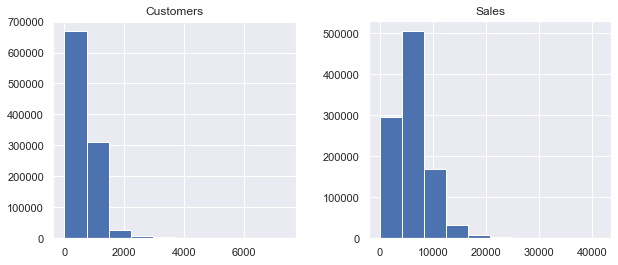

In [96]:
features = ['Customers', 'Sales']
train[features].hist(figsize=(10, 4));

Almost the same thing with the histogram, it explores the distribution of both the customers and sales
across the datasets

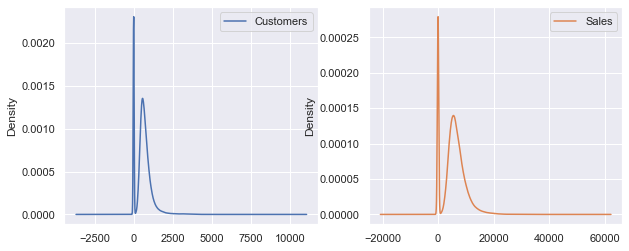

In [362]:
dense_features = ['Customers', 'Sales']
train[dense_features].plot(kind='density', subplots=True, layout=(1, 2), 
                  sharex=False, figsize=(10, 4));

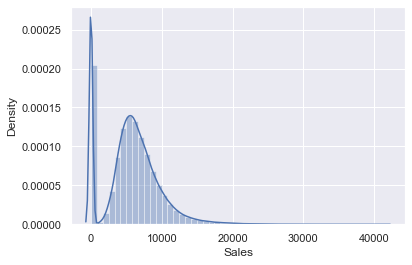

In [97]:
sns.distplot(train['Sales']);

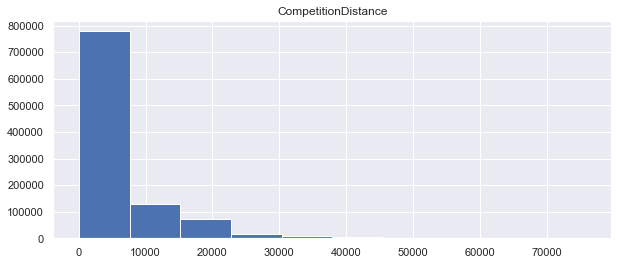

In [98]:
feature = ['CompetitionDistance']
train[feature].hist(figsize=(10, 4));

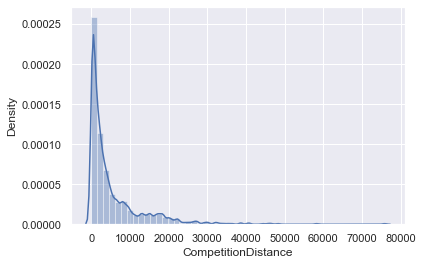

In [109]:
sns.distplot(train['CompetitionDistance']);

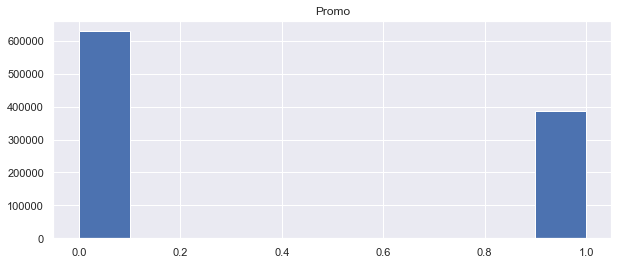

In [110]:
#Check for distribution in both training and test sets - are the promotions 
#distributed similarly between these two groups?
feature = ['Promo']
train[feature].hist(figsize=(10, 4));

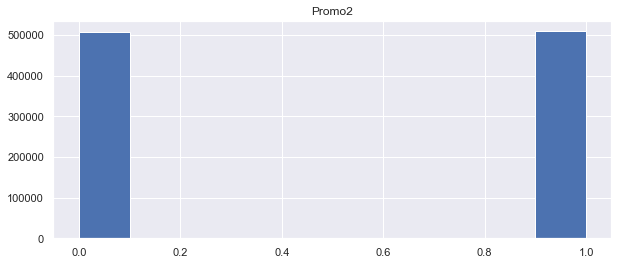

In [111]:
feature = ['Promo2']
train[feature].hist(figsize=(10, 4));

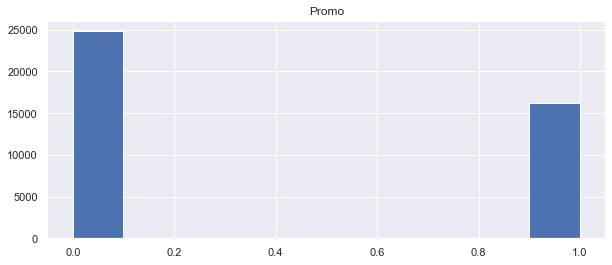

In [114]:
feature = ['Promo']
test[feature].hist(figsize=(10, 4));

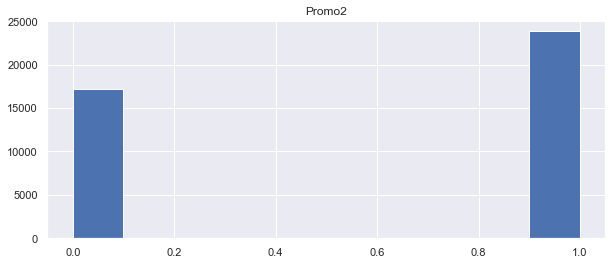

In [115]:
feature = ['Promo2']
test[feature].hist(figsize=(10, 4));

#### Exploring the relationship between Sales and Competition Distance

DEBUG:matplotlib.axes._base:top of axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of axes not in the figure, so title not moved


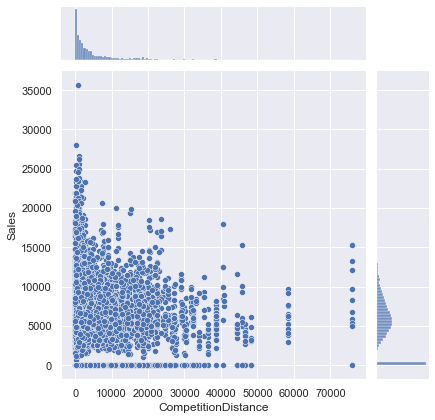

In [204]:
sns.jointplot(x='CompetitionDistance', y='Sales', 
              data=sample, kind='scatter');

#### The relationship between the Competition Distance and sales assumes a linear form 

DEBUG:matplotlib.axes._base:top of axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of axes not in the figure, so title not moved


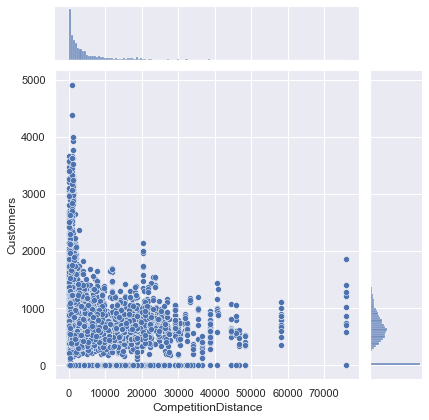

In [205]:
sns.jointplot(y='Customers', x='CompetitionDistance', 
              data=sample, kind='scatter');

#### Boxplot describing the distribution of sales acroos the data

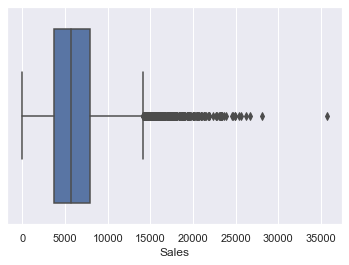

In [101]:
sns.boxplot(x='Sales', data=sample);

#### Boxplot describing the distribution of customers across the data

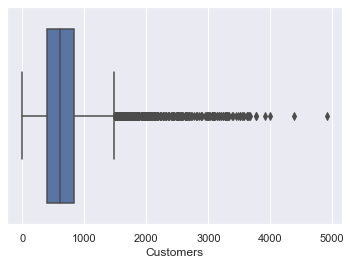

In [102]:
sns.boxplot(x='Customers', data=sample);

The whiskers are the lines extending from the box. They represent the entire scatter of data points, 
specifically the points that fall within the 
interval (Q1−1.5⋅IQR,Q3+1.5⋅IQR), where IQR=Q3−Q1 is the interquartile range.
Outliers that fall outside of the range bounded by the whiskers are plotted individually as black 
points along the central axis.
It is obvious that a large number of sales and customers is quite common in the data.

In [103]:
# adding new variable
train['SalePerCustomer'] = train['Sales']/train['Customers']
train[['SalePerCustomer']].describe()

,SalePerCustomer
count,844340.000000
mean,9.493619
std,2.197494
min,0.000000
25%,7.895563
50%,9.250000
75%,10.899729
max,64.957854


In [147]:
train.groupby('StoreType')['CompetitionDistance'].mean()

StoreType
a    5166.453217
b    1066.058117
c    3516.699503
d    6959.874812
Name: CompetitionDistance, dtype: float64

In [222]:
train['Date'] = pd.to_datetime(train['Date'])
train['day of week'] = train['Date'].dt.day_name()

In [252]:
test['Date'] = pd.to_datetime(test['Date'])
test['day of week'] = test['Date'].dt.day_name()

DEBUG:matplotlib.axes._base:top of axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of axes not in the figure, so title not moved
DEBUG:matplotlib.axes._base:top of axes not in the figure, so ti

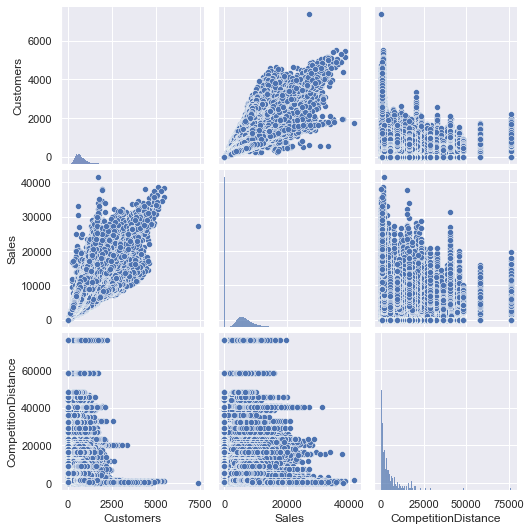

In [185]:
# `pairplot()`
numerical = ['Customers','Sales','CompetitionDistance']
%config InlineBackend.figure_format = 'png'
sns.pairplot(train[numerical]);

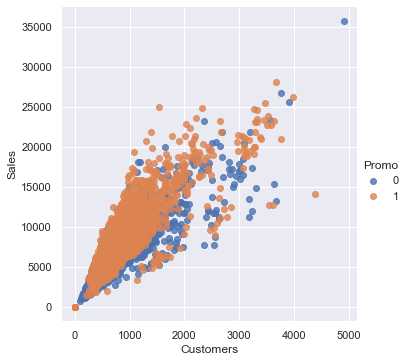

In [187]:
sns.lmplot('Customers', 'Sales', data=sample, hue = 'Promo', fit_reg=False);

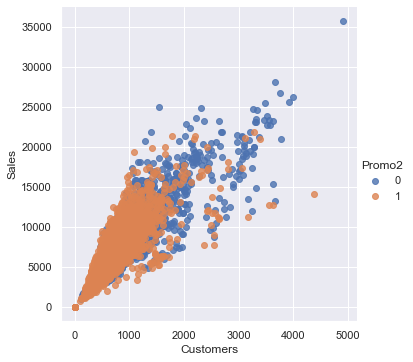

In [194]:
sns.lmplot('Customers', 'Sales', data=sample, hue = 'Promo2', fit_reg=False);

It seems from the above chart that when there is no promo running, there used to 
be a slight increase in sales and customers. This has been explored earlier with a bar chart. 

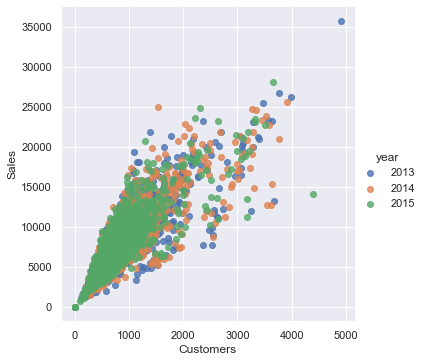

In [197]:
sns.lmplot('Customers', 'Sales', data=sample, hue = 'year', fit_reg=False);

In [203]:
train.groupby('StoreType')[['CompetitionDistance']].mean().sort_values(by='CompetitionDistance', ascending=False)

,CompetitionDistance
StoreType,
d,6959.874812
a,5166.453217
c,3516.699503
b,1066.058117


## Preprocessing

In [356]:
new_train = train.copy()
new_test = test.copy()

In [357]:
new_train['is_weekend'] = ((pd.DatetimeIndex(new_train['Date']).dayofweek) // 5 == 1).astype(int)
new_test['is_weekend'] = ((pd.DatetimeIndex(new_test['Date']).dayofweek) // 5 == 1).astype(int)

In [358]:
logging.info(f'Before, {new_train.shape}, {new_test.shape}')

train_pro = new_train.drop(['CompetitionOpenSinceYear', 'PromoInterval', 'Promo2SinceYear', 'Promo2SinceWeek', 'year'], axis=1)
test_pro = new_test.drop(['CompetitionOpenSinceYear', 'PromoInterval', 'Promo2SinceYear', 'Promo2SinceWeek'], axis=1)

logging.info(f'After, {train_pro.shape}, {test_pro.shape}')

INFO:root:Before, (1017209, 23), (41088, 20)
INFO:root:After, (1017209, 18), (41088, 16)


## Creating a new feature from existing

In [359]:
from pandas.tseries.holiday import (
    AbstractHolidayCalendar, Holiday, DateOffset, EasterMonday, GoodFriday, MO, next_monday, next_monday_or_tuesday
)

class RossmannHolidays(AbstractHolidayCalendar):
    rules = [
        Holiday('New Year\'s Day', month=1, day=1, observance=next_monday),
        GoodFriday,
        EasterMonday,
        Holiday('Public', month=1, day=2, offset=DateOffset(weekday=MO(1))), 
        Holiday('Christmas Day', month=12, day=25, observance=next_monday), 
        Holiday('Boxing Day', month=12, day=26, observance=next_monday_or_tuesday) 
    ]

In [360]:
train_holidays = RossmannHolidays().holidays(start=train_pro.Date.min(), end=train_pro.Date.max())
test_holidays = RossmannHolidays().holidays(start=test_pro.Date.min(), end=test_pro.Date.max())

In [361]:
train_pro['is_holiday'] = np.where(train_pro['Date'].isin(train_holidays), 1, 0)
test_pro['is_holiday'] = np.where(test_pro['Date'].isin(test_holidays), 1, 0)

In [362]:
combine = [train_pro, test_pro]
for dataset in combine:
    dataset['Assortment'] = dataset['Assortment'].map( {'a': 0, 'b': 1, 'c': 2 } ).astype(int)

In [363]:
train_pro = train_pro.drop('StateHoliday', axis = 1)
test_pro = test_pro.drop('StateHoliday', axis = 1)

In [364]:
combine = [train_pro, test_pro]

In [365]:
train_pro

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,Promo2,month,SalePerCustomer,day of week,is_weekend,is_holiday
0,1,5,2015-07-31,5263,555,1,1,1,c,0,1270.0,9.0,0,7,9.482883,Friday,0,0
1,1,4,2015-07-30,5020,546,1,1,1,c,0,1270.0,9.0,0,7,9.194139,Thursday,0,0
2,1,3,2015-07-29,4782,523,1,1,1,c,0,1270.0,9.0,0,7,9.143403,Wednesday,0,0
3,1,2,2015-07-28,5011,560,1,1,1,c,0,1270.0,9.0,0,7,8.948214,Tuesday,0,0
4,1,1,2015-07-27,6102,612,1,1,1,c,0,1270.0,9.0,0,7,9.970588,Monday,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,2013-01-05,4771,339,1,0,1,d,2,5350.0,NaN,1,1,14.073746,Saturday,1,0
1017205,1115,5,2013-01-04,4540,326,1,0,1,d,2,5350.0,NaN,1,1,13.926380,Friday,0,0
1017206,1115,4,2013-01-03,4297,300,1,0,1,d,2,5350.0,NaN,1,1,14.323333,Thursday,0,0
1017207,1115,3,2013-01-02,3697,305,1,0,1,d,2,5350.0,NaN,1,1,12.121311,Wednesday,0,0


In [368]:
train_pro['StoreType'].unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [369]:
test_pro['StoreType'].unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [ ]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier